<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов и датасета.

In [16]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [17]:
scalar_pr = x1.dot(x2)

In [18]:
print('Скалярное произведение первых двух домов: {}'.format(scalar_pr))

Скалярное произведение первых двух домов: 234704.86490859918


Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

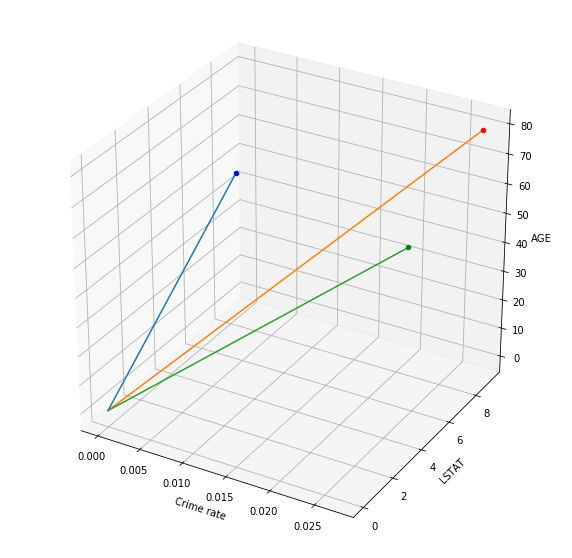

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df['CRIM'])
y = np.array(df['LSTAT'])
z = np.array(df['AGE'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('Crime rate')
ax.set_ylabel('LSTAT')
ax.set_zlabel('AGE')

plt.show()

Найти косинус угла между векторами x1 и x2

In [29]:
cos = x1.dot(x2)/(np.sqrt(sum(x1**2)) * np.sqrt(sum(x2**2)))

In [33]:
print('Косинус угла между векторами x1 и x2: {:.4f}'.format(cos))

Косинус угла между векторами x1 и x2: 0.9943


Найти расстояние между векторами x1 и x2.

In [40]:
print('Расстояние между двумя векторами x1 и x2: {:.3f}'.format(np.sqrt(sum((x1 - x2)**2))))

Расстояние между двумя векторами x1 и x2: 58.955


# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

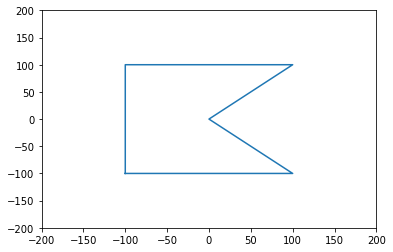

In [115]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [42]:
x_new = x + 300
y_new = y + 200

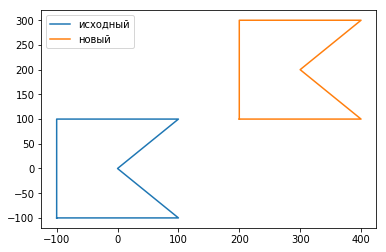

In [54]:
plt.plot(x, y)
plt.plot(x_new, y_new)
plt.legend(['исходный', 'новый'])

Уменьшить объект в два раза.

In [45]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

In [48]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[-50 -50   1]
 [-50  50   1]
 [ 50  50   1]
 [  0   0   1]
 [ 50 -50   1]
 [-50 -50   1]]


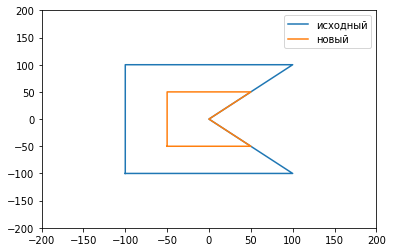

In [53]:
plt.plot(x, y)
plt.plot(B[:, 0], B[:, 1])
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['исходный', 'новый'])

Повернуть на 130 градусов.

In [55]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [56]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[  70  122    1]
 [ 122  -70    1]
 [ -70 -122    1]
 [   0    0    1]
 [-122   70    1]
 [  70  122    1]]


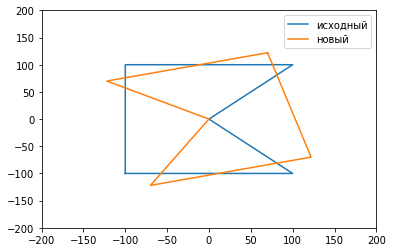

In [57]:
plt.plot(x, y)
plt.plot(B[:, 0], B[:, 1])
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['исходный', 'новый'])

Отразить объект относительно прямой y=x

In [96]:
A = [
    [-100, -100],
    [-100, 100],
    [100, 100],
    [0, 0],
    [100, -100],
    [-100, -100]
]

In [97]:
TransformArray = np.array([
    [0, 1],
    [1, 0],
])

In [101]:
B = np.dot(A, TransformArray)

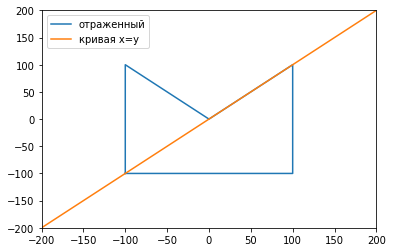

In [120]:
plt.plot(B[:, 0], B[:, 1])
plt.plot([-200, 200], [-200, 200])
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['отраженный', 'кривая x=y'])